# **Laboratorijska vježba 1**: Zadaci za samostalni rad
## **Podaci iz Svjetskog izvješća o sreći**

Svjetsko izvješće o sreći godišnja je publikacija Mreže rješenja za održivi razvoj Ujedinjenih naroda (engl. *United Nations Sustainable Development Solutions Network*). Sadrži članke i ljestvice nacionalne sreće na temelju ocjena vlastitog života ispitanika, koje izvješće također povezuje s različitim životnim čimbenicima.

U ovoj laboratorijskoj vježbi istražit ćemo sreću u različitim zemljama i povezana obilježja. Skupovi podataka koje ćemo koristiti dostupni su u *Data/happiness2020.csv* i *Data/countries_info.csv*.

U nastavku je dan sažetak stupaca (značajki) u skupu podataka:

**happines2020.csv**

*   country - naziv države
*   happiness_score - ocjena sreće
*   social_support - socijalna podrška (ublažavanje učinaka nejednakosti)
*   healthy_life_expectancy - očekivanji zdravi životni vijek
*   freedom_of_choices - sloboda donošenja životnih izbora
*   generosity - velikodušnost (milosrđe, volonteri)
*   perceptrion_of_corruption - percepcija korupcije
*   world_region - regija države u svijetu

**countries_info.csv**

*   country_name - naziv države
*   area - površina u kvadratnim miljama
*   population - broj stanovnika
*   literacy - postotak pismenih stanovnika




In [ ]:
!head Data/countries_info.csv

In [2]:
import pandas as pd
import numpy as np

DATA_FOLDER = 'Data/'

HAPPINESS_DATASET = DATA_FOLDER+"happiness2020.csv"
COUNTRIES_DATASET = DATA_FOLDER+"countries_info.csv"

## **Zadatak 1: Učitavanje podataka**

Učitajte 2 skupa podataka u Pandas DataFrame-ove (zvane *happiness* i *countries*) te prikažite prve retke. Koristite ispravnu metodu za učitavanje podataka i provjerite jesu li podaci u očekivanom formatu.

In [48]:
# Mjesto za Vaš kod
happiness = pd.read_csv(HAPPINESS_DATASET)
countries = pd.read_csv(COUNTRIES_DATASET)

print(happiness.head(1))
print("\n")
print(countries.head(1))

       country  happiness_score  social_support  healthy_life_expectancy  \
0  Afghanistan           2.5669        0.470367                    52.59   

   freedom_of_choices  generosity  perception_of_corruption world_region  
0            0.396573   -0.096429                  0.933687   South Asia  


  country_name    area  population literacy
0  afghanistan  647500    31056997     36,0


## **Zadatak 2: Spajanje podataka**

Kreirajte DataFrame pod nazivom *country_features* spajanjem prethodno stvorena 2 DataFrame-a. Redak novog DataFrame-a mora opisivati sve značajke koje imamo o nekoj državi.


In [27]:
# Mjesto za Vaš kod
country_features = pd.merge(happiness, countries,  how='outer', left_index=True, right_index=True)

print(country_features)


countries_features:

         country  happiness_score  social_support  healthy_life_expectancy  \
0    Afghanistan           2.5669        0.470367                52.590000   
1        Albania           4.8827        0.671070                68.708138   
2        Algeria           5.0051        0.803385                65.905174   
3      Argentina           5.9747        0.900568                68.803802   
4        Armenia           4.6768        0.757479                66.750656   
..           ...              ...             ...                      ...   
130    Venezuela           5.0532        0.890408                66.505341   
131      Vietnam           5.3535        0.849987                67.952736   
132        Yemen           3.5274        0.817981                56.727283   
133       Zambia           3.7594        0.698824                55.299377   
134     Zimbabwe           3.2992        0.763093                55.617260   

     freedom_of_choices  generosity  perce

## **Zadatak 3: Gdje su ljudi sretniji?**

Ispišite prvih 10 država na temelju njihove ocjene sreće (što je veća ocjena, država je sretnija).


In [32]:
# Mjesto za Vaš kod
#grades.sort_values(ascending=[True,False], by=['Age', 'Grade']).head(11)
print(country_features.sort_values(ascending=False,by='happiness_score').head(10))

         country  happiness_score  social_support  healthy_life_expectancy  \
38       Finland           7.8087        0.954330                71.900825   
31       Denmark           7.6456        0.955991                72.402504   
115  Switzerland           7.5599        0.942847                74.102448   
50       Iceland           7.5045        0.974670                73.000000   
92        Norway           7.4880        0.952487                73.200783   
87   Netherlands           7.4489        0.939139                72.300919   
114       Sweden           7.3535        0.926311                72.600769   
88   New Zealand           7.2996        0.949119                73.202629   
6        Austria           7.2942        0.928046                73.002502   
72    Luxembourg           7.2375        0.906912                72.599998   

     freedom_of_choices  generosity  perception_of_corruption  \
38             0.949172   -0.059482                  0.195445   
31         

Zanima nas u kojoj su regiji svijeta ljudi sretniji.

Izradite i ispišite DataFrame s:
1.   Prosječnom ocjenom sreće
2.   Brojem zemalja za svaku svjetsku regiju.

Poredajte rezultat da biste prikazali rangiranje sreće.

In [62]:
grouped = country_features.groupby('world_region')

# calculate the average 'happiness_score' and number of countries in each region
region_happiness = grouped.agg({
    'happiness_score': 'mean',
    'country': 'nunique'
})

# rename columns
region_happiness = region_happiness.rename(columns={'happiness_score': 'average_happiness_score', 'country': 'number_of_countries_in_region'})

# reset the index to make 'world_region' a column
region_happiness = region_happiness.reset_index()

print(region_happiness)


                         world_region  average_happiness_score  \
0          Central and Eastern Europe                 5.891393   
1  Commonwealth of Independent States                 5.358342   
2                           East Asia                 5.483633   
3         Latin America and Caribbean                 5.971280   
4        Middle East and North Africa                 5.269306   
5               North America and ANZ                 7.173525   
6                          South Asia                 4.355083   
7                      Southeast Asia                 5.517788   
8                  Sub-Saharan Africa                 4.393856   
9                      Western Europe                 6.967405   

   number_of_countries_in_region  
0                             14  
1                             12  
2                              3  
3                             20  
4                             16  
5                              4  
6                           

Najbolje rangirana regija ima samo nekoliko država! Koje su to i koji je njihov rezultat sreće?

In [89]:
best_ranked_region = region_happiness.sort_values(ascending=False,by='average_happiness_score').head(1)['world_region']

best_r_region = "South Africa"

print(happiness.query("world_region == 'North America and ANZ'"))

#print(best_ranked_region)

#best_ranked_region_countries = country_features.where(country_features['world_region'] == 'North America 'and' ANZ')
#print(best_ranked_region_countries)

           country  happiness_score  social_support  healthy_life_expectancy  \
5        Australia           7.2228        0.944855                73.604538   
21          Canada           7.2321        0.927177                73.601601   
88     New Zealand           7.2996        0.949119                73.202629   
127  United States           6.9396        0.914219                68.299500   

     freedom_of_choices  generosity  perception_of_corruption  \
5              0.915432    0.190460                  0.415169   
21             0.933913    0.124771                  0.390843   
88             0.936217    0.191598                  0.221139   
127            0.842620    0.149892                  0.699715   

              world_region  
5    North America and ANZ  
21   North America and ANZ  
88   North America and ANZ  
127  North America and ANZ  


## **Zadatak 4: Koliko je svijet pismen?**

Ispišite nazive država s razinom pismenosti od 100%.

Za svaku zemlju ispište naziv i regiju svijeta u formatu: {ime regije}-{ime zemlje} ({ocjena sreće}).


In [95]:
#print(country_features['country'])

print(countries.query("literacy == '100,0'"))


   country_name     area  population literacy
5     australia  7686850    20264082    100,0
31      denmark    43094     5450661    100,0
38      finland   338145     5231372    100,0
72   luxembourg     2586      474413    100,0
92       norway   323802     4610820    100,0


Koliki je globalni prosjek razine pismenosti?

In [123]:
global_literacy_average = 0.0
for x in range(135):
    try:
        country_literacy = countries['literacy'][x].replace(',','.')
    except AttributeError:
        pass
    global_literacy_average += float(country_literacy)
global_literacy_average /= 136
print(global_literacy_average)  

81.4610294117647


Izračunajte udio zemalja s razinom pismenosti ispod 50%. Ispišite vrijednost u postotcima, formatiranu s 2 decimale.

In [139]:
#for some reason the query returns 4 countries with literacy of 100 so that is why thre is "- 4"
countries_under_50 = len(countries.query("literacy < '50'")) - 4
all_countries = 136
ratio_countries_under_50 = format((countries_under_50/all_countries)*100, ".2f")
print(f'{ratio_countries_under_50}% of countries have 50% or less literate people.')

12.50% of countries have 50% or less literate people.


Ispišite neobrađeni broj i postotak nepismenog svjetskog stanovništva.

In [161]:
global_iliteracy = 0.0
for x in range(135):
    try:
        country_literacy = countries['literacy'][x].replace(',','.')
    except AttributeError:
        pass
    global_iliteracy += 100 - float(country_literacy)
global_iliteracy /= 13600
global_iliteracy = format(global_iliteracy, ".2f")
print(f"{global_iliteracy}% people are iliterate.")

0.18% people are iliterate.


## **Zadatak 5: Gustoća naseljenosti**

Dodajte DataFrame-u *country_features* novi stupac zvan *population_density* koji se dobije dijeljenjem stupca *population* sa stupcem *area*.

In [163]:
country_features['pupulation_density'] = countries['population']/countries['area']
print(country_features['pupulation_density'])

0       47.964474
1      124.587971
2       13.826065
3       14.428413
4       99.878255
          ...    
130     28.211650
131    256.108041
132     40.639029
133     15.282748
134     31.329830
Name: pupulation_density, Length: 135, dtype: float64


Koji je rezultat sreće za 3 države s najnižom gustoćom naseljenosti?

In [185]:
lowest_3_density = country_features.sort_values(ascending=True, by='pupulation_density').head(3)
print(f"Mongolia happiness score: {lowest_3_density['happiness_score'][83]}, Australia happiness score: {lowest_3_density['happiness_score'][5]}, Botswana happiness score: {lowest_3_density['happiness_score'][14]}")

Mongolia happiness score: 5.456200123, Australia happiness score: 7.222799778, Botswana happiness score: 3.478899956


## **Zadatak 6: Zdravi i sretni?**

Iscrtajte na raspršeni dijagram (engl. *scatter plot*) ocjenu sreće (x os) i očekivano trajanje zdravog života (y os).

<Axes: xlabel='happiness_score', ylabel='healthy_life_expectancy'>

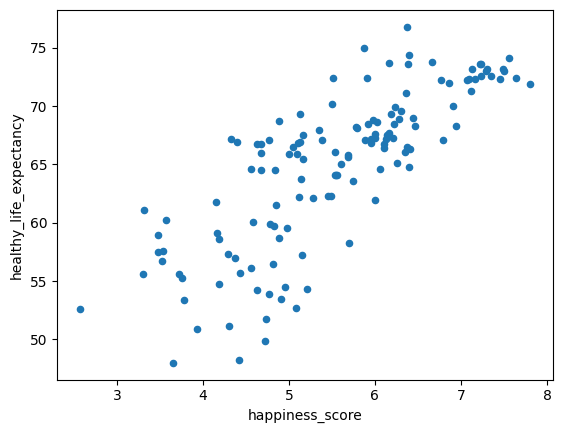

In [190]:
import matplotlib.pyplot as plt
country_features.plot.scatter(x='happiness_score',y='healthy_life_expectancy')